In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Popular Anime:

### What are the top 10 most popular anime based on user ratings?

In [2]:
user_ratings_df = pd.read_csv('users-score-2023.csv')

In [3]:
# Eliminamos aquellos animes que no tengan mas de 200 puntuaciones
total_counts = user_ratings_df['anime_id'].value_counts()
user_ratings_df['GroupSizeCheck'] = user_ratings_df['anime_id'].map(lambda x: 200 < total_counts[x])
user_ratings_df = user_ratings_df[user_ratings_df['GroupSizeCheck'] == True]
user_ratings_df.drop(columns={'GroupSizeCheck'},inplace=True)

In [4]:
anime_ratings = {}

In [5]:
for _, row in user_ratings_df.groupby('anime_id'):
    anime_mean_rating = np.mean(row['rating'])
    anime_ratings[row['Anime Title'].values[0]] = anime_mean_rating

In [6]:
top_10_sorted_anime_ratings = sorted(anime_ratings.items(), key=lambda x:x[1], reverse=True)[:10]

In [7]:
top_10_sorted_anime_ratings = pd.DataFrame(top_10_sorted_anime_ratings, columns=['Anime', 'Score'])

In [8]:
top_10_sorted_anime_ratings

,Anime,Score
0,Fullmetal Alchemist: Brotherhood,9.139213
1,Gintama°,9.115830
2,Gintama',9.096199
3,Gintama': Enchousen,9.048558
4,Clannad: After Story,9.030958
5,Steins;Gate,9.010111
6,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,9.005479
7,Ginga Eiyuu Densetsu,8.978483
8,Kimi no Na wa.,8.973839
9,Hunter x Hunter (2011),8.914231


## Popular Anime: 
### Is there a correlation between the number of episodes and user ratings?

In [9]:
anime_dataset_df = pd.read_csv('anime-dataset-2023.csv')

In [10]:
anime_dataset = anime_dataset_df[['anime_id', 'Episodes']].copy()

anime_dataset['Episodes'] = pd.to_numeric(anime_dataset['Episodes'], errors='coerce')
anime_dataset.dropna(subset=['Episodes'], inplace=True)
anime_dataset['Episodes'] = anime_dataset['Episodes'].astype('int64')
anime_dataset.reset_index(drop=True, inplace=True)

user_ratings = user_ratings_df[['anime_id', 'rating']].copy()

In [11]:
anime_dataset_user_ratings = anime_dataset.merge(user_ratings, on='anime_id', how='left')

In [12]:
anime_dataset_user_ratings['Episodes'].corr(anime_dataset_user_ratings['rating'])

0.044112176365942064

### EL valor cercano a 0 (0,044) sugiere una correlación inexistente, por lo que no hay una relación lineal entre la cantidad de episodios y las puntuaciones de los usuarios

## Genre Analysis:
### Which anime genres are most commonly produced?

In [13]:
anime_genres = anime_dataset_df[anime_dataset_df['Genres'] != 'UNKNOWN']['Genres'].copy()

In [14]:
split_values = anime_genres.str.split(',')
flat_values = [item.strip() for sublist in split_values for item in sublist]
qty_genres = pd.Series(flat_values).value_counts().to_frame()

In [15]:
qty_genres.reset_index(inplace=True)

In [16]:
qty_genres.rename(columns={'index': 'Genres'}, inplace=True)

<Axes: xlabel='Genres'>

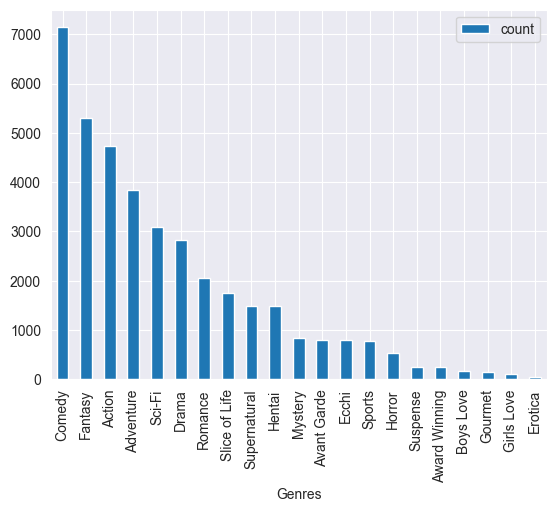

In [17]:
qty_genres.plot.bar(x='Genres', y='count', rot=90)

## Genre Analysis:
### Are there certain genres that tend to receive higher ratings?

In [18]:
unique_genres = qty_genres['Genres'].tolist()

In [19]:
anime_genres_score = anime_dataset_df[anime_dataset_df['Genres'] != 'UNKNOWN'][['anime_id', 'Genres', 'Score']].copy()

In [20]:
for col in unique_genres:
    anime_genres_score[col] = 0.0

In [21]:
columns_order = list(anime_genres_score['Genres'])

In [22]:
for i, column in enumerate(columns_order):
    columns_order[i] = columns_order[i].split(', ')

In [23]:
anime_genres_score = anime_genres_score[anime_genres_score['Score'] != 'UNKNOWN'].copy()

In [24]:
anime_genres_score['Score'] = pd.to_numeric(anime_genres_score['Score'], errors='coerce')
anime_genres_score.dropna(subset=['Score'], inplace=True)
anime_genres_score['Score'] = anime_genres_score['Score'].astype('float64')
anime_genres_score.reset_index(drop=True, inplace=True)

In [25]:
for i, row in anime_genres_score.iterrows():
    anime_genres_score.loc[i, columns_order[i]] = row['Score']

In [26]:
anime_genres_score_mean_list = []

In [27]:
for col in unique_genres:
    genre_rating = anime_genres_score[anime_genres_score[col] != 0.0].copy()
    mean_rating = genre_rating[col].mean()
    anime_genres_score_mean_list.append((col, round(mean_rating, 4), len(genre_rating)))

In [28]:
mean_rating_genres = pd.DataFrame(anime_genres_score_mean_list, columns=['Genres', 'mean_rating', 'qty_of_ratings'])

In [29]:
mean_rating_genres.sort_values(by='mean_rating', ascending=False)

,Genres,mean_rating,qty_of_ratings
16,Award Winning,6.7441,206
5,Drama,6.5663,2328
10,Mystery,6.5472,665
11,Avant Garde,6.5245,405
6,Romance,6.5206,1668
3,Adventure,6.5052,2704
13,Sports,6.5026,596
19,Girls Love,6.5015,94
15,Suspense,6.4895,147
4,Sci-Fi,6.4893,2464


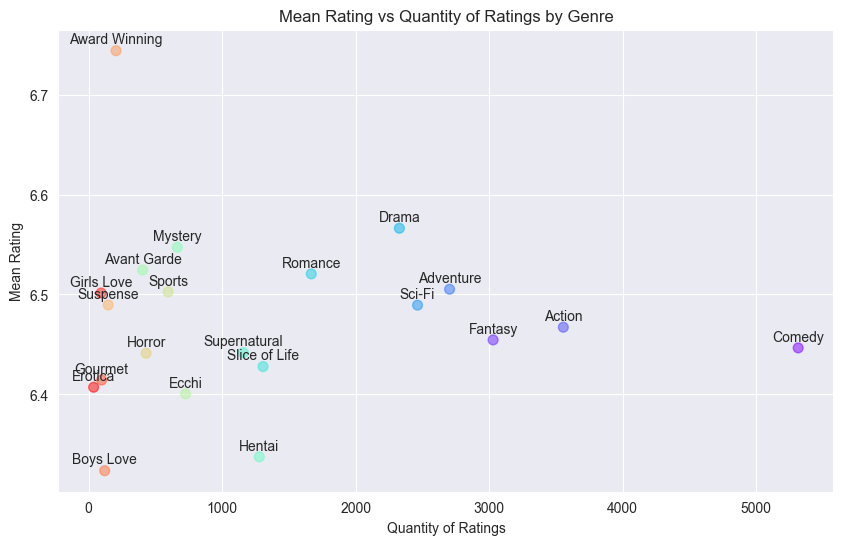

In [30]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(mean_rating_genres['Genres'])))

plt.figure(figsize=(10, 6))
plt.scatter(mean_rating_genres['qty_of_ratings'], mean_rating_genres['mean_rating'], s=50, alpha=0.5, c=colors)

# Annotate each point with its genre
for i, genre in enumerate(mean_rating_genres['Genres']):
    plt.annotate(genre, (mean_rating_genres['qty_of_ratings'][i], mean_rating_genres['mean_rating'][i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Mean Rating vs Quantity of Ratings by Genre')
plt.xlabel('Quantity of Ratings')
plt.ylabel('Mean Rating')
plt.grid(True)
plt.show()

## Genre Analysis:
### What are the most popular genres among different genders?

In [31]:
users_details_df = pd.read_csv('users-details-2023.csv')

In [32]:
users_details = users_details_df[['Mal ID', 'Gender']].copy()
users_details.rename(columns={'Mal ID': 'user_id'}, inplace=True)

In [33]:
users_details['Gender'] = users_details['Gender'].apply(lambda x: 'Other' if (x != 'Male' and x != 'Female' and x != 'Non-Binary') else x)

In [34]:
user_anime_id = user_ratings_df[['user_id', 'anime_id']].copy()
user_anime_gender = user_anime_id.merge(users_details, on='user_id', how='left')

In [35]:
anime_id_values = {}
for _, grouped in user_anime_gender.groupby('anime_id'):
    gender_count = grouped['Gender'].value_counts()
    id_ = grouped['anime_id'].values[0]
    male = gender_count['Male'] if 'Male' in gender_count else 0
    female = gender_count['Female'] if 'Female' in gender_count else 0
    other = gender_count['Other'] if 'Other' in gender_count else 0
    non_binary = gender_count['Non-Binary'] if 'Non-Binary' in gender_count else 0
    anime_id_values[id_] = [male, female, other, non_binary]

In [36]:
mask_genres_list = []
for genre in unique_genres:
    mask = anime_genres_score[genre] != 0.0
    mask_genres_list.append(anime_genres_score[mask]['anime_id'].values)

In [37]:
gender_genre = pd.DataFrame(0, index=unique_genres, columns=['Male', 'Female', 'Other', 'Non-Binary'])

In [38]:
for i, mask in enumerate(mask_genres_list):
    matching_values = [anime_id_values[index] for index in mask if index in anime_id_values]
    genre_values = pd.DataFrame(matching_values, columns=gender_genre.columns)
    values_list = list(genre_values.sum())
    gender_genre.loc[unique_genres[i]] = values_list

In [39]:
gender_genre.sort_values(by=['Male', 'Female', 'Other', 'Non-Binary'], ascending=False, inplace=True)
gender_genre = gender_genre.head(5)

Text(0.5, 1.0, 'Popular Genres by Non-binaries')

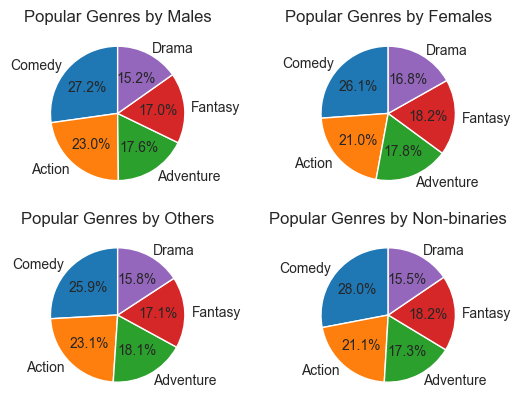

In [40]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].pie(gender_genre['Male'], labels=gender_genre.index,autopct='%1.1f%%', startangle=90) 
axis[0, 0].set_title("Popular Genres by Males")

axis[0, 1].pie(gender_genre['Female'], labels=gender_genre.index,autopct='%1.1f%%', startangle=90) 
axis[0, 1].set_title("Popular Genres by Females")

axis[1, 0].pie(gender_genre['Other'], labels=gender_genre.index,autopct='%1.1f%%', startangle=90) 
axis[1, 0].set_title("Popular Genres by Others")

axis[1, 1].pie(gender_genre['Non-Binary'], labels=gender_genre.index,autopct='%1.1f%%', startangle=90) 
axis[1, 1].set_title("Popular Genres by Non-binaries")

## User Preferences:
### What is the distribution of user ratings for the entire dataset?

In [41]:
anime_ratings_distribution = anime_dataset_df[['anime_id', 'Score']].copy()

In [42]:
anime_ratings_distribution['Score'] = pd.to_numeric(anime_ratings_distribution['Score'], errors='coerce')
anime_ratings_distribution.dropna(subset=['Score'], inplace=True)
anime_ratings_distribution['Score'] = anime_ratings_distribution['Score'].astype('float64')
anime_ratings_distribution.reset_index(drop=True, inplace=True)

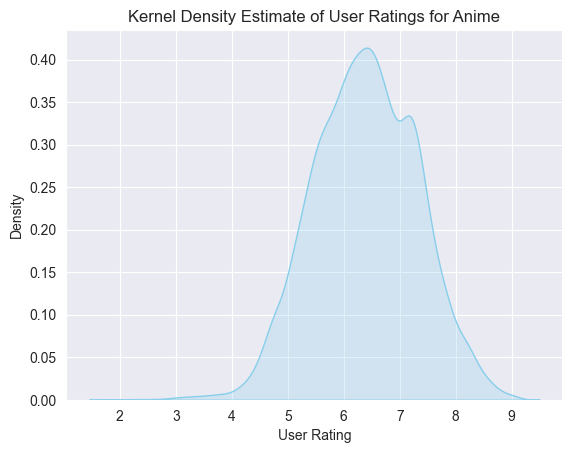

In [43]:
sns.kdeplot(anime_ratings_distribution['Score'], fill=True, color='skyblue')
plt.title('Kernel Density Estimate of User Ratings for Anime')
plt.xlabel('User Rating')
plt.ylabel('Density')
plt.show()

## Seasonal Trends:
### Do certain genres become more popular during specific seasons?

In [44]:
seasonal_anime = anime_dataset_df[['anime_id', 'Aired', 'Premiered', 'Genres', 'Studios']].copy()

In [45]:
unknown_premiered_anime = seasonal_anime[seasonal_anime['Premiered'] == 'UNKNOWN'].copy()

In [46]:
unknown_premiered_anime['Aired'] = unknown_premiered_anime['Aired'].apply(lambda x: x.split(',')[0])
unknown_premiered_anime['Aired'] = unknown_premiered_anime['Aired'].apply(lambda x: x.split(' ')[0])

In [47]:
seasons = {
    'Mar': 'spring',
    'Apr': 'spring',
    'May': 'spring',
    'Jun': 'summer',
    'Jul': 'summer',
    'Aug': 'summer',
    'Sep': 'fall',
    'Oct': 'fall',
    'Nov': 'fall',
    'Dec': 'winter',
    'Jan': 'winter',
    'Feb': 'winter'
}

In [48]:
unknown_premiered_anime['Premiered'] =  unknown_premiered_anime['Aired'].map(seasons).fillna(unknown_premiered_anime['Premiered'])

In [49]:
seasonal_anime.update(unknown_premiered_anime)

In [50]:
seasonal_anime['Premiered'] = seasonal_anime['Premiered'].apply(lambda x: x.split(' ')[0])

In [51]:
seasonal_anime = seasonal_anime[seasonal_anime['Premiered'] != 'UNKNOWN']

In [52]:
seasonal_genre_count = {}
for genre in unique_genres:
    seasonal_genre_count[genre] = 0

In [53]:
columns_ = []
seasonal_genres_values_list = []

In [54]:
for _, grouped in seasonal_anime.groupby('Premiered'):
    seasonal_genre_count = {key: 0 for key in seasonal_genre_count}
    columns_.append(grouped['Premiered'].values[0])
    for row in grouped.itertuples():
        for genre in unique_genres:
            if genre in row.Genres.split(', '):
                seasonal_genre_count[genre] += 1
    seasonal_genres_values_list.append(list(seasonal_genre_count.values()))

In [55]:
seasonal_genres = pd.DataFrame(0, index=unique_genres, columns=columns_)

In [56]:
for i, season in enumerate(columns_):
    seasonal_genres[season] = seasonal_genres_values_list[i]

In [57]:
seasonal_genres = seasonal_genres.reset_index()

In [58]:
seasonal_genres_1 = seasonal_genres.iloc[:6]
seasonal_genres_2 = seasonal_genres.iloc[6:12]
seasonal_genres_3 = seasonal_genres.iloc[12:18]
seasonal_genres_4 = seasonal_genres.iloc[18:]

In [59]:
def plot_graphs_genres_season(df, limit_val):
    
    genres = list(df['index'])

    season_names = {
        'fall':df['fall'].to_list(),
        'spring': df['spring'].to_list(),
        'summer': df['summer'].to_list(),
        'winter': df['winter'].to_list(),
    }
    
    x = np.arange(len(genres))  # the label locations
    width = 0.22  # the width of the bars
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained', figsize=(10,6))
    
    
    for attribute, measurement in season_names.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=4, color='black')
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('qty')
    ax.set_xlabel('Genres')
    ax.set_title('Genres by season')
    ax.set_xticks(x + width, genres)
    ax.legend(loc='upper right', ncols=4)
    ax.set_ylim(0, limit_val)
    
    plt.show()

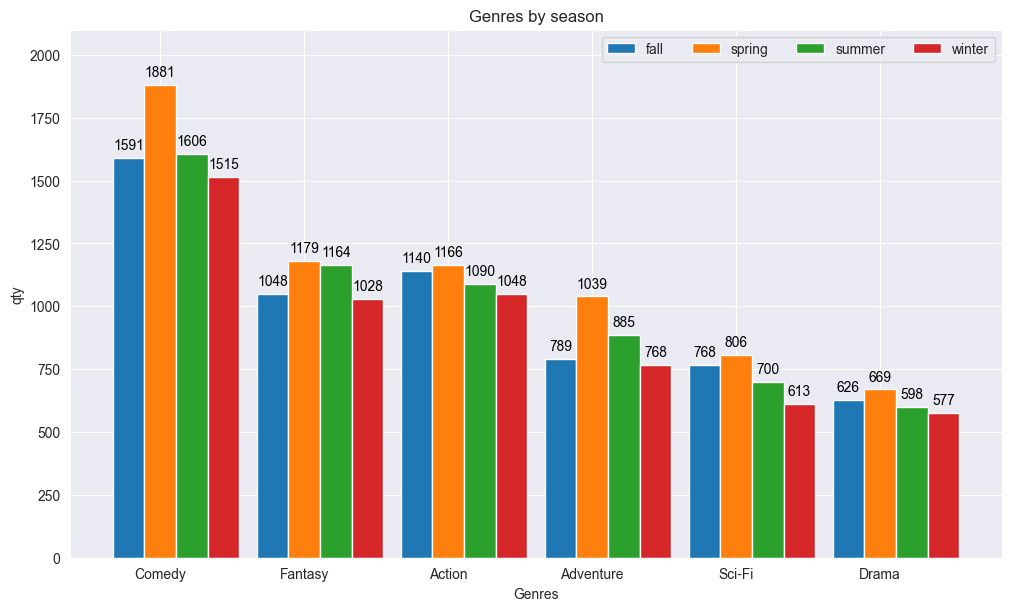

In [60]:
plot_graphs_genres_season(seasonal_genres_1, 2100)

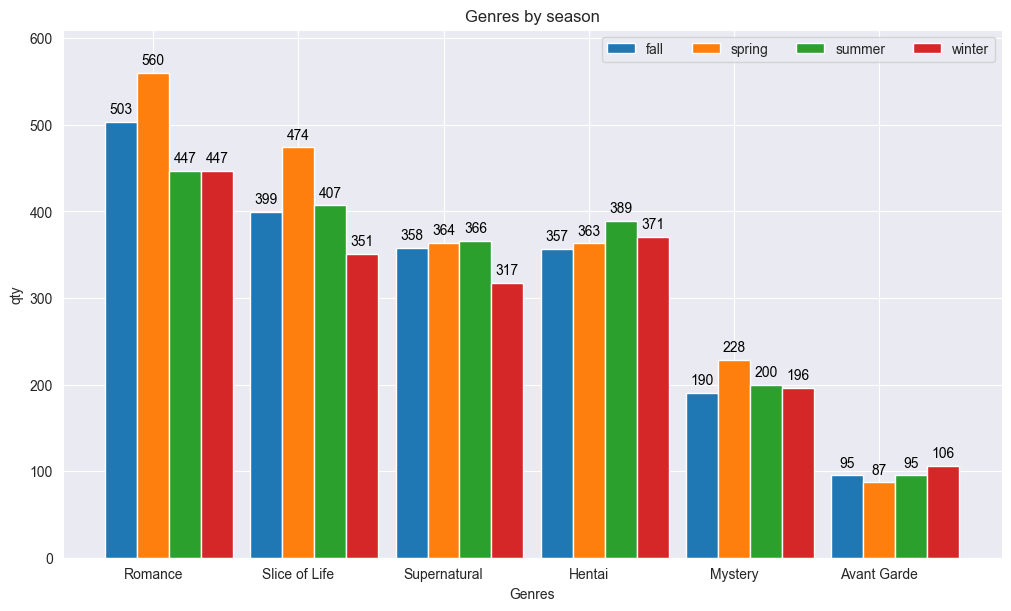

In [61]:
plot_graphs_genres_season(seasonal_genres_2, 610)

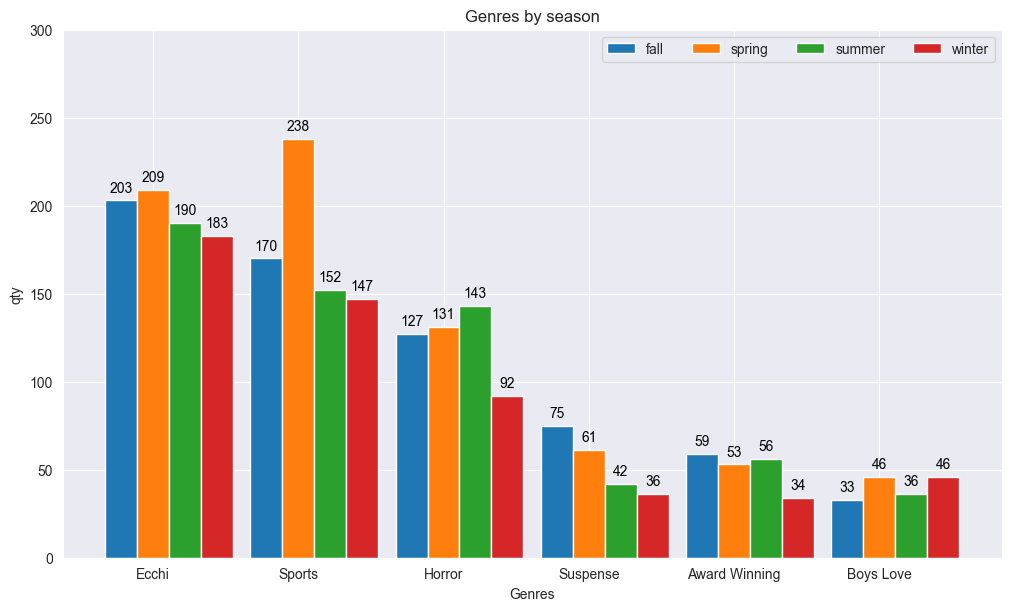

In [62]:
plot_graphs_genres_season(seasonal_genres_3, 300)

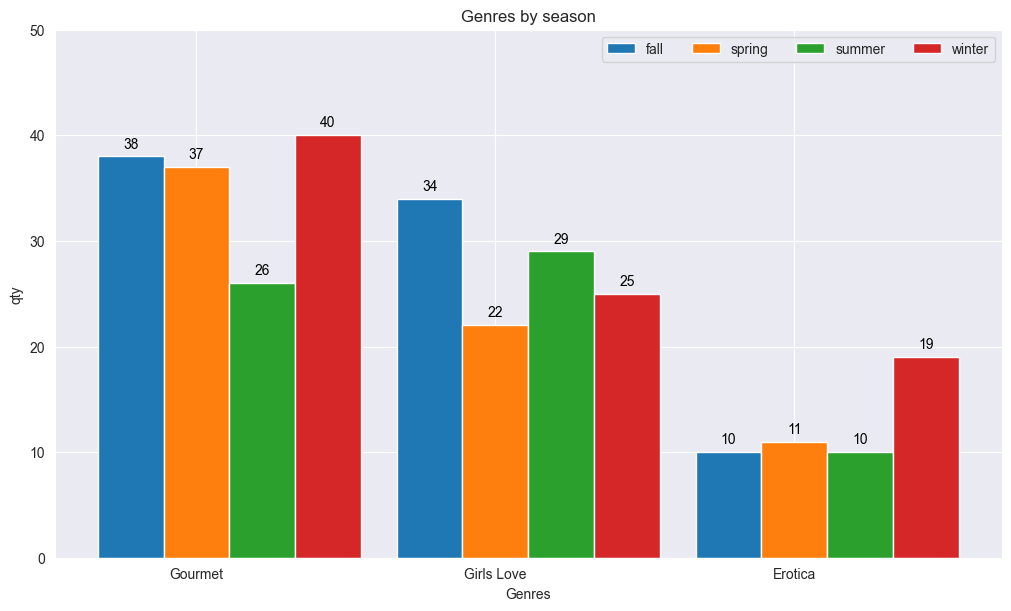

In [63]:
plot_graphs_genres_season(seasonal_genres_4, 50)

## Studios and Directors:
### Which studios or directors have the highest average ratings for their anime?

In [64]:
studios_ratings = anime_dataset_df[['Studios', 'Score', 'Favorites', 'Popularity', 'Rank']].copy()

In [65]:
studios_ratings['Score'] = pd.to_numeric(studios_ratings['Score'], errors='coerce')
studios_ratings.dropna(subset=['Score'], inplace=True)
studios_ratings['Score'] = studios_ratings['Score'].astype('float64')
studios_ratings.reset_index(drop=True, inplace=True)

In [66]:
studios_ratings = studios_ratings.assign(Studios=studios_ratings['Studios'].str.split(', ')).explode('Studios')

In [67]:
studios_ratings_dict = []

In [68]:
for _, grouped in studios_ratings.groupby('Studios'):
    studio = grouped['Studios'].values[0]
    qty_animes = len(grouped)
    mean_rating = grouped['Score'].mean()
    studios_ratings_dict.append((studio, mean_rating, qty_animes))

In [69]:
studios_mean_ratings = pd.DataFrame(studios_ratings_dict, columns=['Studios', 'mean_ratings', 'qty'])
studios_mean_ratings.sort_values(by='mean_ratings', ascending=False, inplace=True)

In [70]:
studios_mean_ratings

,Studios,mean_ratings,qty
345,K-Factory,8.396667,3
475,Nippon Ramayana Film Co.,8.290000,1
205,Egg Firm,8.287500,4
624,Sharefun Studio,8.095000,4
747,Studio Signpost,7.902500,4
...,...,...,...
378,Kuri Jikken Manga Kobo,3.730000,1
582,RAMS,3.330000,1
261,General Entertainment,3.210000,1
115,Brio Animation,3.060000,1


## Studios and Directors:
### Is there a correlation between the involvement of a specific studio or director and the success of an anime?

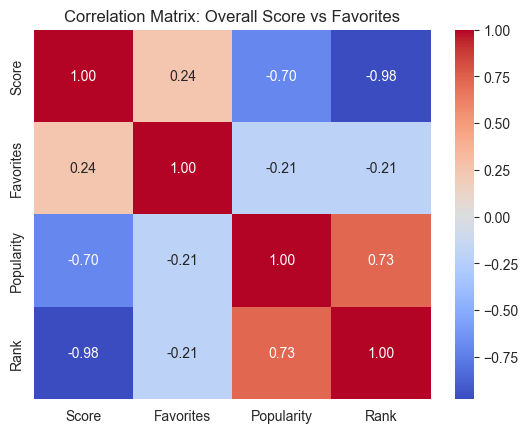

In [71]:
correlation_matrix = studios_ratings[['Score', 'Favorites', 'Popularity', 'Rank']]

correlation_matrix = correlation_matrix[(correlation_matrix['Score'] != 'UNKNOWN')]
correlation_matrix = correlation_matrix[(correlation_matrix['Favorites'] != 'UNKNOWN')]
correlation_matrix = correlation_matrix[(correlation_matrix['Popularity'] != 'UNKNOWN')]
correlation_matrix = correlation_matrix[(correlation_matrix['Rank'] != 'UNKNOWN')]

correlation_matrix = correlation_matrix.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Overall Score vs Favorites')
plt.show()

## User Engagement:
### Are there specific anime that have high engagement but relatively lower ratings?

In [72]:
members_ratings = anime_dataset_df[['anime_id', 'Name', 'Score', 'Members']].copy()

In [73]:
members_ratings.sort_values(['Score', 'Members'],ascending = [True, False], inplace=True)

In [74]:
members_ratings = members_ratings[members_ratings['Members'] > 1000000].head(15)

In [75]:
members_ratings.reset_index(drop=True, inplace=True)

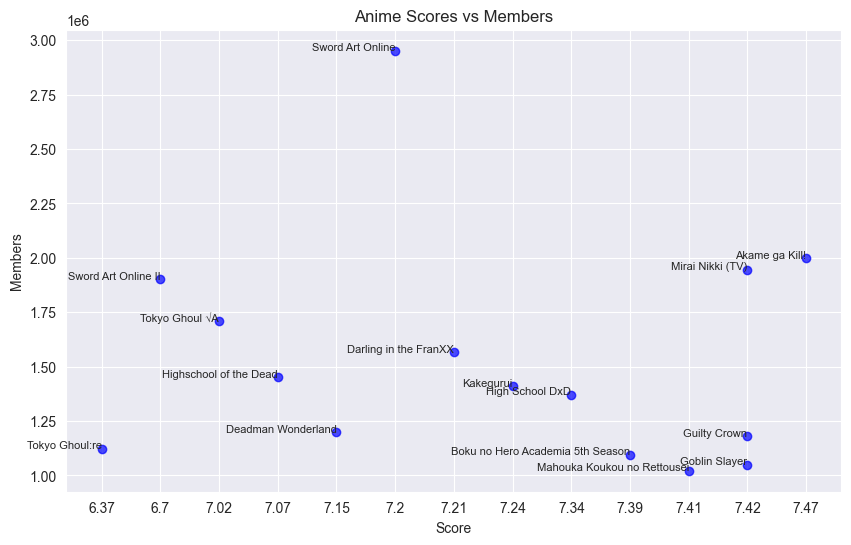

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(members_ratings['Score'], members_ratings['Members'], color='blue', alpha=0.7)

for i, txt in enumerate(members_ratings['Name']):
    plt.text(members_ratings['Score'][i], members_ratings['Members'][i], txt, fontsize=8, ha='right')

plt.title('Anime Scores vs Members')
plt.xlabel('Score')
plt.ylabel('Members')
plt.grid(True)
plt.show()

## Demographic Analysis:
### Is there a difference in preferences between male and female users?

In [77]:
gender_preference_df = pd.read_csv('final_animedataset.csv')

In [78]:
gender_preference_df = gender_preference_df[gender_preference_df['gender'] != 'Non-Binary'][['gender', 'genre']]
gender_preference_df = gender_preference_df[~gender_preference_df['genre'].isna()]

In [79]:
male_gender_preference = {}
female_gender_preference = {}

In [80]:
columns_order_genre = list(gender_preference_df['genre'])

for i, column in enumerate(columns_order_genre):
    columns_order_genre[i] = columns_order_genre[i].split(', ')

In [81]:
from itertools import chain
 
columns_order_genre_unique = list(set(chain(*columns_order_genre)))

In [82]:
for unique_genre in columns_order_genre_unique:
    male_gender_preference[unique_genre] = 0
    female_gender_preference[unique_genre] = 0

In [83]:
for row in gender_preference_df.itertuples():
    gender = row.gender
    for unique_genre in columns_order_genre_unique:
        if unique_genre in row.genre.split(', '):
            if gender == 'Male':
                male_gender_preference[unique_genre] +=1
            if gender == 'Female':
                female_gender_preference[unique_genre] +=1

In [84]:
genres_gender_values = []

In [85]:
for key in male_gender_preference:
    genres_gender_values.append((key, male_gender_preference[key], female_gender_preference[key]))

In [86]:
genres_gender = pd.DataFrame(genres_gender_values, columns=['Genres', 'Male', 'Female'])

In [87]:
genres_gender.sort_values(by=['Male', 'Female'], ascending=False, inplace=True)

In [88]:
genres_gender

,Genres,Male,Female
7,Comedy,12443717,4674081
30,Action,10506464,3482950
32,Romance,7422955,3058903
11,Drama,6718771,3104768
8,Fantasy,6232419,2477082
0,School,6205281,2163059
13,Supernatural,5899197,2408702
21,Shounen,5862779,2134648
37,Sci-Fi,5428070,1658090
2,Adventure,5195149,1970463


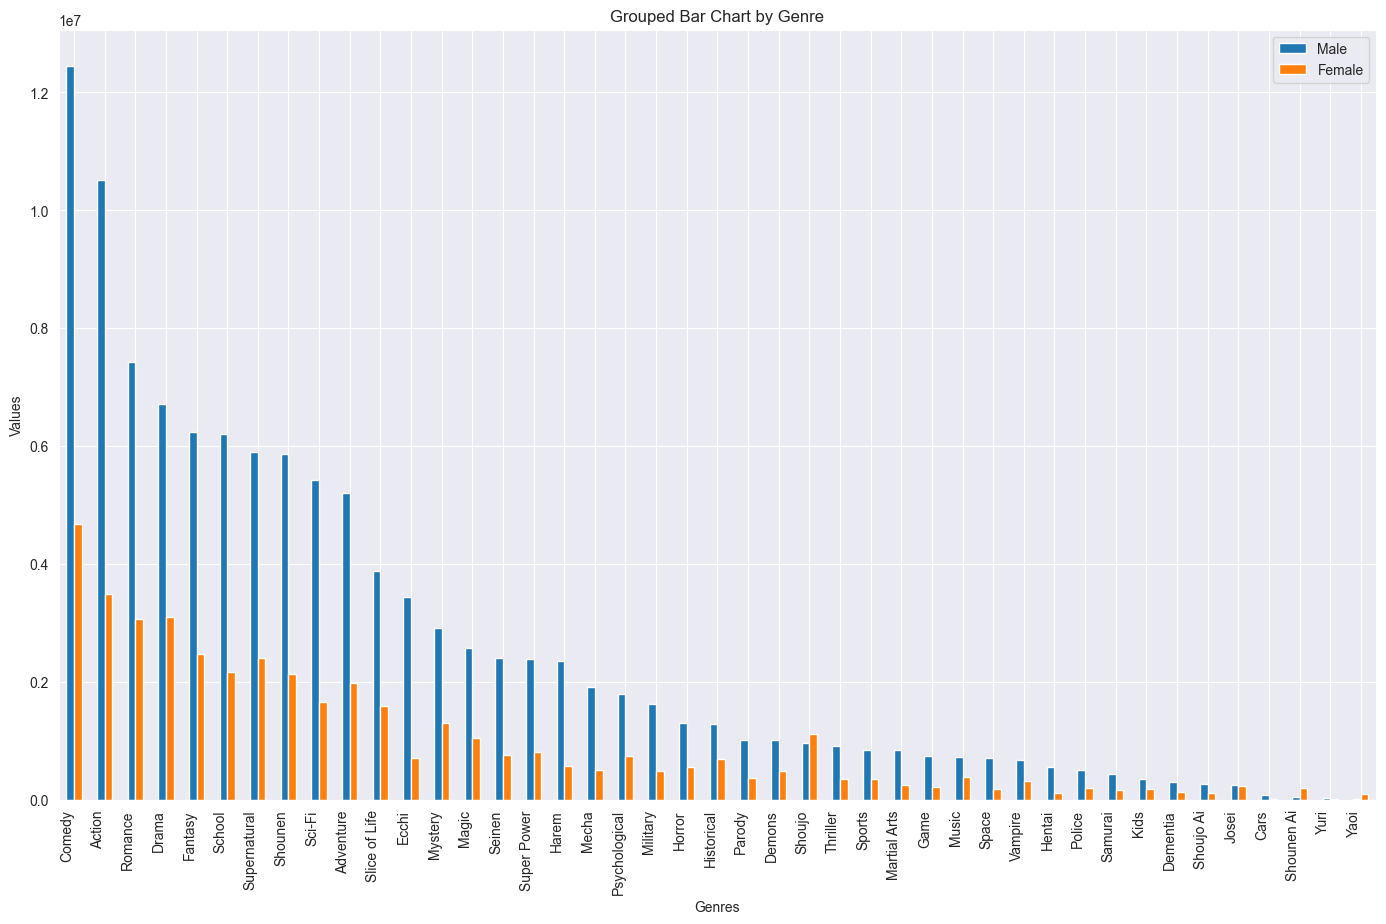

In [89]:
ax = genres_gender.plot(x='Genres', y=['Male', 'Female'], kind='bar', figsize=(17, 10))
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart by Genre')
plt.xticks(rotation=90, ha='right')
plt.show()